In [1]:
import sys
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python')
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/research_Haukeli/Python/Weathermast_Retrieval_MEPS/')

import numpy as np
import netCDF4
import pandas as pd
import matplotlib.pyplot as plt

import createFolder as cF
np.warnings.filterwarnings('ignore')

import fct_windspeed_sorting as fct

In [2]:
m = ['11', '12', '01', '02', '03']
station = 'Haukeliseter'

In [3]:
savefig = 0
if savefig == 1:
    figdir = '../../Figures/Weathermast_MEPS_Retrieval/%s/wd_density_histo' %(station)
    cF.createFolder('%s/' %figdir)
form = 'png'

In [4]:
f = dict()
obs_precip_diff      = dict()
obs_precip_diff_2deg = dict()
obs_west_idx         = dict()
obs_east_idx         = dict()
obs_precip_total     = dict()
obs_precip_west      = dict()
obs_precip_east      = dict()
obs_precip_total_2deg= dict()
obs_precip_west_2deg = dict()
obs_precip_east_2deg = dict()
    
meps_precip_diff     = dict()
meps_precip_diff_2deg= dict()
meps_west_idx        = dict()
meps_east_idx        = dict()
meps_precip_total    = dict()
meps_precip_west     = dict()
meps_precip_east     = dict()
meps_precip_total_2deg= dict()
meps_precip_west_2deg = dict()
meps_precip_east_2deg = dict()
    
ret_precip_diff      = dict()
ret_precip_total     = dict()
ret_precip_west      = dict()
ret_precip_east      = dict()


for month in m:
    if month == '11':
#        t = np.arange(8,31)
        t = [9, 12, 13, 14, 15, 16, 17, 23, 24, 26,29,30]
    if month == '12': #or  or 
 #       t = np.arange(1,32)
        t = [7, 9, 10, 11, 12, 13, 15, 21, 22, 23, 24, 25, 26, 29, 30, 31]
    if month == '01':
        t = [2, 3, 6, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 23, 24, 25, 28, 29]
    if month == '02':
  #      t = np.arange(1,29)
        t = [2, 3, 4, 6]
    if month == '03':
        t = [9, 14, 16, 17, 19, 21, 24, 30, 31]
    if month == '11' or month == '12':
        year = '2016'
    if month == '01' or month == '02' or month == '03':
        year = '2017'
    
    for day in t:
        
        if day < 10:
            day = '0%s' %day
        else:
            day = '%s' %day
            
        Date = int(year+month+day)
        nc_dir = '../../Data/Weathermast_MEPS_Retrieval/'+station+'/weathermast_meps_retrieval_%s.nc' %(Date)

        f[Date] = netCDF4.Dataset(nc_dir, 'r')

        obs_precip_diff[Date]      = f[Date].variables['obs_precipitation_difference'][:]
        obs_precip_diff_2deg[Date] = f[Date].variables['obs_precipitation_difference_2degC'][:]
        obs_west_idx[Date]         = f[Date].variables['obs_idx_westerly'][:].astype(int)
        obs_east_idx[Date]         = f[Date].variables['obs_idx_easterly'][:].astype(int)

        meps_precip_diff[Date]     = f[Date].variables['meps_precipitation_difference'][:]
        meps_precip_diff_2deg[Date]= f[Date].variables['meps_precipitation_difference_2degC'][:]
        meps_west_idx[Date]        = f[Date].variables['meps_idx_westerly'][:]
        meps_east_idx[Date]        = f[Date].variables['meps_idx_easterly'][:]

        ret_precip_diff[Date]      = f[Date].variables['ret_precipitation_difference'][:]

        f[Date].close()

        ############################################
        if len(obs_west_idx[Date]) == 0 and len(obs_east_idx[Date]) == 0:
            obs_precip_total[Date] = np.nan
            obs_precip_west[Date]  = np.nan
            obs_precip_east[Date]  = np.nan
        ### observation == reference
        obs_precip_total[Date] = np.nansum(obs_precip_diff[Date][obs_west_idx[Date],]) + \
                                 np.nansum(obs_precip_diff[Date][obs_east_idx[Date],])
        obs_precip_west[Date]  = np.nansum(obs_precip_diff[Date][obs_west_idx[Date],])
        obs_precip_east[Date]  = np.nansum(obs_precip_diff[Date][obs_east_idx[Date],])
        ### retrieval
        ret_precip_total[Date] = np.nansum(ret_precip_diff[Date][obs_west_idx[Date],]) + \
                                 np.nansum(ret_precip_diff[Date][obs_east_idx[Date],])
        ret_precip_west[Date]  = np.nansum(ret_precip_diff[Date][obs_west_idx[Date],])
        ret_precip_east[Date]  = np.nansum(ret_precip_diff[Date][obs_east_idx[Date],])
        ### MEPS
        meps_precip_total[Date] = []
        meps_precip_west[Date]  = []
        meps_precip_east[Date]  = []
        for ens_memb in range(10):
            total = np.nansum(meps_precip_diff[Date][np.where(~np.isnan(meps_west_idx[Date][:,ens_memb])), ens_memb]) + \
                    np.nansum(meps_precip_diff[Date][np.where(~np.isnan(meps_east_idx[Date][:,ens_memb])), ens_memb])
            meps_precip_total[Date].append(total)

            westerly = np.nansum(meps_precip_diff[Date][np.where(~np.isnan(meps_west_idx[Date][:,ens_memb])), ens_memb])
            meps_precip_west[Date].append(westerly)

            easterly = np.nansum(meps_precip_diff[Date][np.where(~np.isnan(meps_east_idx[Date][:,ens_memb])), ens_memb])
            meps_precip_east[Date].append(easterly)

            del total, westerly, easterly

        ## for precipitation below 2degC
        ### observation
        obs_precip_total_2deg[Date] = np.nansum(obs_precip_diff_2deg[Date][obs_west_idx[Date],]) + \
                                      np.nansum(obs_precip_diff_2deg[Date][obs_east_idx[Date],])
        obs_precip_west_2deg[Date]  = np.nansum(obs_precip_diff_2deg[Date][obs_west_idx[Date],])
        obs_precip_east_2deg[Date]  = np.nansum(obs_precip_diff_2deg[Date][obs_east_idx[Date],])
        
        ### MEPS
        meps_precip_total_2deg[Date] = []
        meps_precip_west_2deg[Date]  = []
        meps_precip_east_2deg[Date]  = []
        for ens_memb in range(10):
            total = np.nansum(meps_precip_diff_2deg[Date][np.where(~np.isnan(meps_west_idx[Date][:,ens_memb])), ens_memb]) + \
                    np.nansum(meps_precip_diff_2deg[Date][np.where(~np.isnan(meps_east_idx[Date][:,ens_memb])), ens_memb])
            meps_precip_total_2deg[Date].append(total)

            westerly = np.nansum(meps_precip_diff_2deg[Date][np.where(~np.isnan(meps_west_idx[Date][:,ens_memb])), ens_memb])
            meps_precip_west_2deg[Date].append(westerly)

            easterly = np.nansum(meps_precip_diff_2deg[Date][np.where(~np.isnan(meps_east_idx[Date][:,ens_memb])), ens_memb])
            meps_precip_east_2deg[Date].append(easterly)

            del total, westerly, easterly
            


In [5]:
obs_precip_total_2deg = fct.get_array_of_dictionary(obs_precip_total_2deg)
obs_precip_west_2deg = fct.get_array_of_dictionary(obs_precip_west_2deg)
obs_precip_east_2deg = fct.get_array_of_dictionary(obs_precip_east_2deg)

obs_precip_total_2deg[np.where(obs_precip_total_2deg[:,:] == 0.)] = np.nan
obs_precip_west_2deg[np.where(obs_precip_west_2deg[:,:] == 0.)] = np.nan
obs_precip_east_2deg[np.where(obs_precip_east_2deg[:,:] == 0.)] = np.nan

obs_precipitation_24 = [obs_precip_total_2deg[:,1],
                    obs_precip_west_2deg[:,1],
                    obs_precip_east_2deg[:,1]]
obs_precipitation_24 = np.array(obs_precipitation_24)
obs_direction = ['double fence - total', 'double fence - west', 'double fence - east']

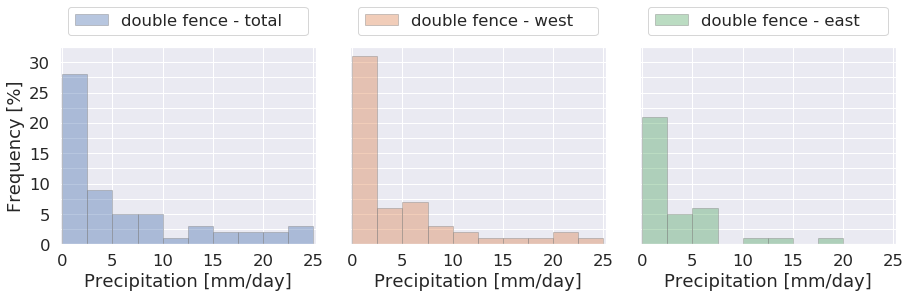

In [6]:
import seaborn

seaborn.set_context("paper")
seaborn.set(font_scale=1.5)
#plt.rcParams.update({'font.size': 40})
seaborn.set_style("darkgrid")


# Three subplots, unpack the axes array immediately
f, axs = plt.subplots(1, 3, sharey=True)
f.set_figheight(4.5)
f.set_figwidth(13)
f.subplots_adjust(hspace=.35, wspace=.15)
palette = seaborn.color_palette('deep')
palette = palette[0:3]

for col in range(3):
    bar = seaborn.distplot(obs_precipitation_24[col,np.where(~np.isnan(obs_precipitation_24[col,:]))], 
                           hist=True, kde=False, 
             bins=int(25/2.5), 
       #     bins = int(np.round(np.max(obs_precipitation_24[col,np.where(~np.isnan(obs_precipitation_24[col,:]))]),1)/2.5),
                     color = palette[col], 
             hist_kws={'edgecolor':'grey','range':(0,25)},
             kde_kws={'linewidth': 4}, ax=axs[col],
             label = np.array(obs_direction)[col])
    axs[col].legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')
    axs[col].set_xlim([-0.25,25.25])
    axs[col].set_ylim([0,32.5])
#    axs[col].set_ylim([0,0.25])
    axs[col].set_xticks(np.arange(0,30,5))
    axs[col].set_yticks(np.arange(0,35,2.5))
#    axs[col].set_yticks(np.arange(0,0.3,0.025))
    axs[col].set_yticklabels(['0', '', '5', '', '10', '', '15', '', '20','','25','','30',''])
#    axs[col].set_yticklabels(['0.0', '', '0.05', '', '0.10', '', '0.15', '', '0.20','','0.25','','0.30',''])
    axs[col].set_xlabel('Precipitation [mm/day]')
    axs[0].set_ylabel('Frequency [%]')
#    axs[0].set_ylabel('Density')
plt.tight_layout()


if savefig == 1:
    cF.createFolder('%s/' %(figdir))
#    fig_name = 'winter_16_17_obs_hist_dens'
    fig_name = 'winter_16_17_obs_histogram'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()

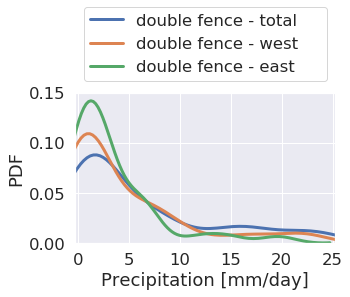

In [7]:
# Three subplots, unpack the axes array immediately
f, axs = plt.subplots(1, 1, sharey=True)
f.set_figheight(4.5)
f.set_figwidth(13/2.5)

for k in range(3):
    seaborn.distplot(obs_precipitation_24[k,np.where(~np.isnan(obs_precipitation_24[k,:]))],
                    hist=False,
                    kde=True,
                    color = palette[k],
                    kde_kws={'linewidth':3,'clip':(0.,25.)},
                    label=obs_direction[k])
axs.legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')
axs.set_xlim([-0.25,25.25])
axs.set_ylim([0,0.15])
axs.set_xticks(np.arange(0,30,5))
axs.set_yticks(np.arange(0,0.2,0.05))
axs.set_xlabel('Precipitation [mm/day]')
axs.set_ylabel('PDF')
plt.tight_layout()

if savefig == 1:
    cF.createFolder('%s/' %(figdir))
    fig_name = 'winter_16_17_obs_density'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()

In [8]:
ret_precip_total = fct.get_array_of_dictionary(ret_precip_total)
ret_precip_west = fct.get_array_of_dictionary(ret_precip_west)
ret_precip_east = fct.get_array_of_dictionary(ret_precip_east)

ret_precip_total[np.where(ret_precip_total[:,:] == 0.)] = np.nan
ret_precip_west[np.where(ret_precip_west[:,:] == 0.)] = np.nan
ret_precip_east[np.where(ret_precip_east[:,:] == 0.)] = np.nan

ret_precipitation_24 = [ret_precip_total[:,1],
                    ret_precip_west[:,1],
                    ret_precip_east[:,1]]
ret_precipitation_24 = np.array(ret_precipitation_24)
ret_direction = ['retrieved - total', 'retrieved - west', 'retrieved - east']

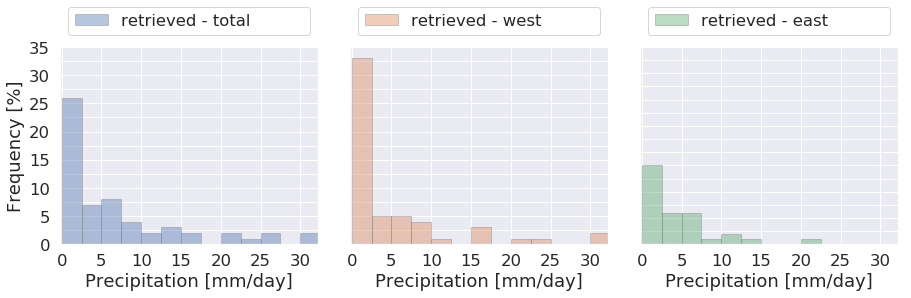

In [9]:
seaborn.set_context("paper")
seaborn.set(font_scale=1.5)
#plt.rcParams.update({'font.size': 40})
seaborn.set_style("darkgrid")


# Three subplots, unpack the axes array immediately
f, axs = plt.subplots(1, 3, sharey=True)
f.set_figheight(4.5)
f.set_figwidth(13)
f.subplots_adjust(hspace=.35, wspace=.15)


for col in range(3):
    bar = seaborn.distplot(ret_precipitation_24[col,np.where(~np.isnan(ret_precipitation_24[col,:]))], 
                           hist=True, kde=False, 
            bins=int(14),
    #        bins=int(int(np.round(np.max(ret_precipitation_24[col,np.where(~np.isnan(ret_precipitation_24[col,:]))]),1)*2)),
                     color = palette[col],
             hist_kws={'edgecolor':'grey','range':(0,35)},
             kde_kws={'linewidth': 4}, ax=axs[col],
             label = np.array(ret_direction)[col])
    axs[col].legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')
    axs[col].set_xlim([-0.25,32.25])
    axs[col].set_ylim([0,35])
#    axs[col].set_ylim([0,0.25])
    axs[col].set_xticks(np.arange(0,35,5))
    
    axs[col].set_yticks(np.arange(0,40,2.5))
#    axs[col].set_yticks(np.arange(0,0.30,0.025))
    axs[col].set_yticklabels(['0', '', '5', '', '10', '', '15', '', '20','','25','','30','','35'])
#    axs[col].set_yticklabels(['0.0', '', '0.05', '', '0.10', '', '0.15', '', '0.20','','0.25','','0.30','','0.35'])
    axs[col].set_xlabel('Precipitation [mm/day]')
    axs[0].set_ylabel('Frequency [%]')
#    axs[0].set_ylabel('Density')
plt.tight_layout()

if savefig == 1:
    cF.createFolder('%s/' %(figdir))
    fig_name = 'winter_16_17_ret_histogram'
#    fig_name = 'winter_16_17_ret_hist_dens'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()

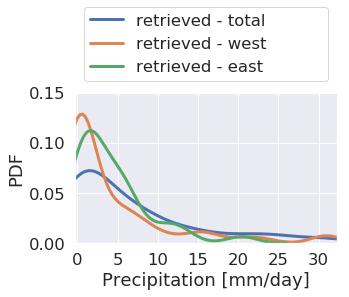

In [10]:
# Three subplots, unpack the axes array immediately
f, axs = plt.subplots(1, 1, sharey=True)
f.set_figheight(4.5)
f.set_figwidth(13/2.5)

for k in range(3):
    seaborn.distplot(ret_precipitation_24[k,np.where(~np.isnan(ret_precipitation_24[k,:]))],
                    hist=False,
                    kde=True,
                    color = palette[k],
                    kde_kws={'linewidth':3,'clip':(0.,35.)},
                    label=ret_direction[k])
axs.legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')
axs.set_xlim([-0.25,32.25])
axs.set_ylim([0,0.15])
axs.set_xticks(np.arange(0,35,5))
axs.set_yticks(np.arange(0,0.2,0.05))
axs.set_xlabel('Precipitation [mm/day]')
axs.set_ylabel('PDF')
plt.tight_layout()

if savefig == 1:
    cF.createFolder('%s/' %(figdir))
    fig_name = 'winter_16_17_ret_density'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()

In [11]:
meps_precip_total_2deg = fct.get_array_of_dictionary_MEPS(meps_precip_total_2deg)
meps_precip_west_2deg = fct.get_array_of_dictionary_MEPS(meps_precip_west_2deg)
meps_precip_east_2deg = fct.get_array_of_dictionary_MEPS(meps_precip_east_2deg)

meps_precip_total_2deg[np.where(meps_precip_total_2deg[:,:] == 0.)] = np.nan
meps_precip_west_2deg[np.where(meps_precip_west_2deg[:,:] == 0.)] = np.nan
meps_precip_east_2deg[np.where(meps_precip_east_2deg[:,:] == 0.)] = np.nan

In [12]:
meps_precipitation_24 = dict()

for ens_memb in range(10):
    meps_precipitation_24[ens_memb] = np.empty(shape=(3, meps_precip_total_2deg.shape[0]))
    meps_precipitation_24[ens_memb][:] = np.nan
    meps_precipitation_24[ens_memb][:,:] = np.array((meps_precip_total_2deg[:,ens_memb+ 1], 
                                                  meps_precip_west_2deg[:,ens_memb+1], 
                                                  meps_precip_east_2deg[:,ens_memb+1]))

In [13]:
meps_precipitation_24_mean = np.empty(shape=(3, meps_precip_total_2deg.shape[0]))
meps_precipitation_24_mean[:] = np.nan
meps_precipitation_24_mean[:,:] = np.array((np.nanmean(meps_precip_total_2deg[:,1:],axis=1),
                                           np.nanmean(meps_precip_west_2deg[:,1:],axis=1),
                                           np.nanmean(meps_precip_east_2deg[:,1:],axis=1)) )

In [14]:
#meps_precipitation_24 = np.array(meps_precipitation_24)
meps_direction = ['MEPS - total', 'MEPS - west', 'MEPS - east']

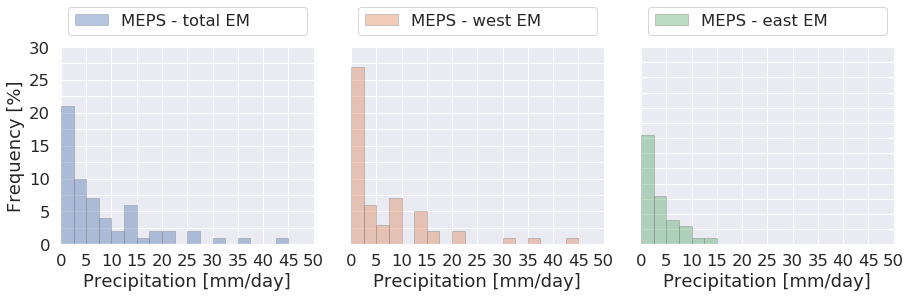

In [15]:
seaborn.set_context("paper")
seaborn.set(font_scale=1.5)
#plt.rcParams.update({'font.size': 40})
seaborn.set_style("darkgrid")


# Three subplots, unpack the axes array immediately
f, axs = plt.subplots(1, 3, sharey=True)
f.set_figheight(4.5)
f.set_figwidth(13)
f.subplots_adjust(hspace=.35, wspace=.15)

for col in range(3):
        seaborn.distplot(meps_precipitation_24_mean[col, np.where(~np.isnan(meps_precipitation_24_mean[col,:]))],
                         hist=True, kde=False, 
                         bins=(int(20)),
                    #     bins=int(np.round(np.max(meps_precipitation_24[row][col,np.where(~np.isnan(meps_precipitation_24[row][col,:]))]),1)*2),
                         color = palette[col],
                         hist_kws={'edgecolor':'grey','range':(0,50)},
                         kde_kws={'linewidth': 4},
                         ax=axs[col],
                         label = np.array(meps_direction)[col]+' EM')
        axs[col].legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')
        axs[col].set_xlim([-0.25,50.25])
        axs[col].set_ylim([0,30])
#        axs[col].set_ylim([0,0.25])
        axs[col].set_xticks(np.arange(0,55,5))
        axs[col].set_yticks(np.arange(0,35,2.5))
#        axs[col].set_yticks(np.arange(0,0.3,0.025))
        axs[col].set_yticklabels(['0', '','5','','10','','15','','20','','25','','30'])
#        axs[col].set_yticklabels(['0.0', '','0.5','','0.10','','0.15','','0.20','','0.25','','0.30'])

        axs[col].set_xlabel('Precipitation [mm/day]')
        axs[0].set_ylabel('Frequency [%]')
#        axs[0].set_ylabel('Density')
plt.tight_layout()

if savefig == 1:
    cF.createFolder('%s/' %(figdir))
    fig_name = 'winter_16_17_MEPS_histogram_ensemble_mean'
#    fig_name = 'winter_16_17_MEPS_hist_dens_ensemble_mean'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()

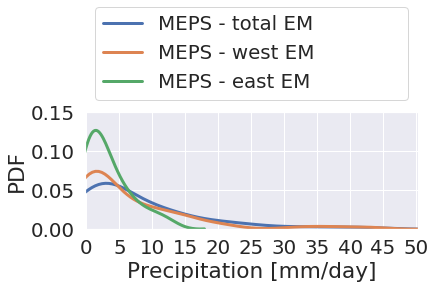

In [17]:
seaborn.set_context("paper")
seaborn.set(font_scale=1.8)
#plt.rcParams.update({'font.size': 40})
seaborn.set_style("darkgrid")

# Three subplots, unpack the axes array immediately
f, axs = plt.subplots(1, 1, sharey=True)
f.set_figheight(4.5)
f.set_figwidth(13/2)

for k in range(3):
        
            seaborn.distplot(meps_precipitation_24_mean[k, np.where(~np.isnan(meps_precipitation_24_mean[k,:]))],
                    hist=False,
                    kde=True,
                    color = palette[k],
                    kde_kws={'linewidth':3,'clip':(0.,50.)},
                    ax=axs,
                    label=meps_direction[k]+' EM'
                        )
            axs.legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')
        
            axs.set_xlim([-0.25,50.25])
            axs.set_ylim([0,0.15])
            axs.set_xticks(np.arange(0,55,5))
            axs.set_yticks(np.arange(0,0.2,0.05))
#        axs.text(0.17, 0.89, 'EM %s' %ens_memb,
 #                         verticalalignment='bottom',
  #                        horizontalalignment='right',
   #                       transform=axs[ens_memb].transAxes,
    #                      color='black',
     #                     fontweight='bold',
      #                    bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5.5})
            axs.set_xlabel('Precipitation [mm/day]')
            axs.set_ylabel('PDF')
plt.tight_layout()

if savefig == 1:
    cF.createFolder('%s/' %(figdir))
    fig_name = 'winter_16_17_MEPS_density_ensemble_mean'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()

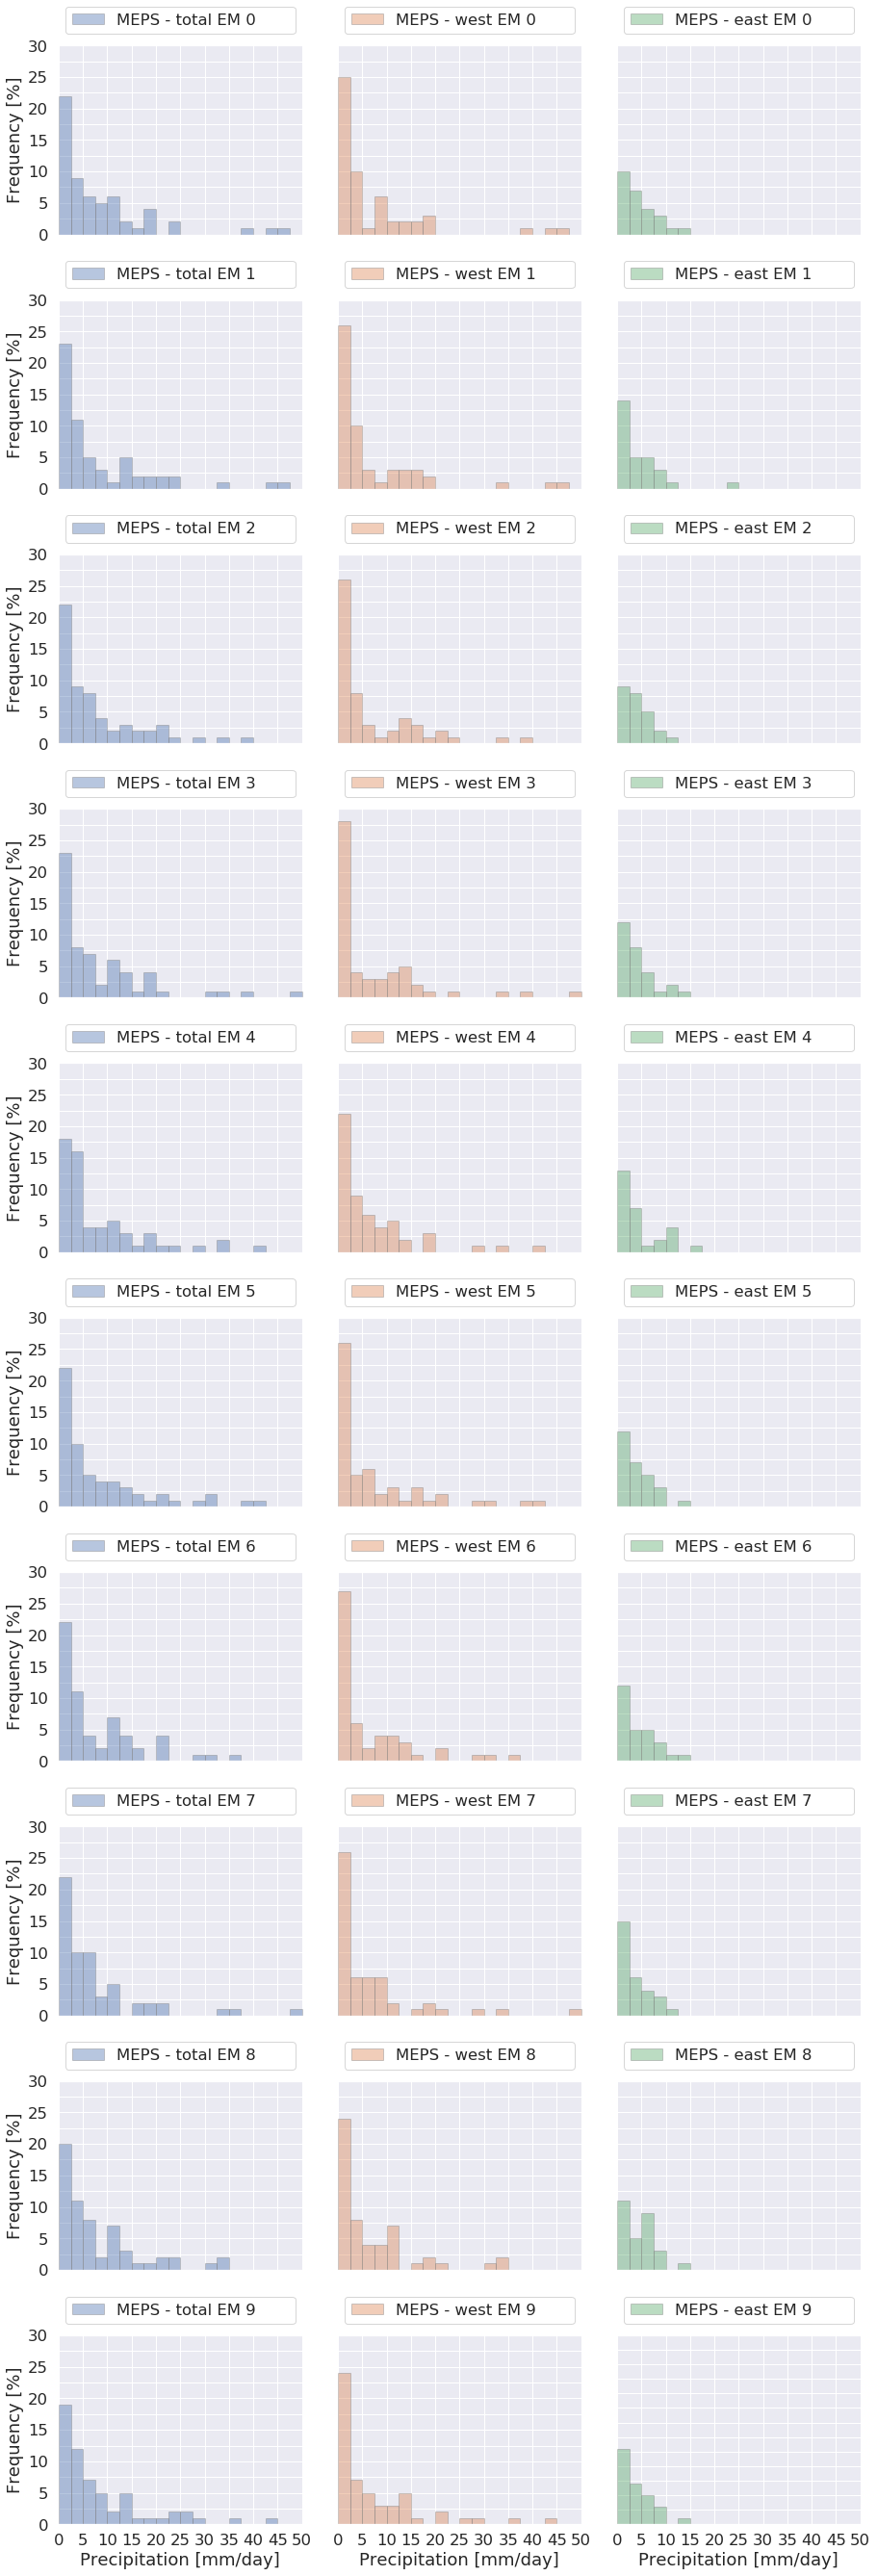

In [18]:

seaborn.set_context("paper")
seaborn.set(font_scale=1.5)
#plt.rcParams.update({'font.size': 40})
seaborn.set_style("darkgrid")


# Three subplots, unpack the axes array immediately
f, axs = plt.subplots(10, 3, sharex = True, sharey=True)
f.set_figheight(37.5)
f.set_figwidth(13)
f.subplots_adjust(hspace=.35, wspace=.15)

for row in range(10):
    for col in range(3):
        seaborn.distplot(meps_precipitation_24[row][col, np.where(~np.isnan(meps_precipitation_24[row][col,:]))],
                         hist=True, kde=False, 
                         bins=(int(20)),
                    #     bins=int(np.round(np.max(meps_precipitation_24[row][col,np.where(~np.isnan(meps_precipitation_24[row][col,:]))]),1)*2),
                         color = palette[col],
                         hist_kws={'edgecolor':'grey','range':(0,50)},
                         kde_kws={'linewidth': 4},
                         ax=axs[row,col],
                         label = np.array(meps_direction)[col]+' EM '+str(row))
        axs[row,col].legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')
        axs[row,col].set_xlim([-0.25,50.25])
        axs[row,col].set_ylim([0,30])
#        axs[row,col].set_ylim([0,0.25])
        axs[row,col].set_xticks(np.arange(0,55,5))
        axs[row,col].set_yticks(np.arange(0,35,2.5))
#        axs[row,col].set_yticks(np.arange(0,0.3,0.025))
        axs[row,col].set_yticklabels(['0', '','5','','10','','15','','20','','25','','30'])
#        axs[row,col].set_yticklabels(['0.0', '','0.5','','0.10','','0.15','','0.20','','0.25','','0.30'])

        axs[-1,col].set_xlabel('Precipitation [mm/day]')
        axs[row,0].set_ylabel('Frequency [%]')
#        axs[row,0].set_ylabel('Density')
plt.tight_layout()

if savefig == 1:
    cF.createFolder('%s/' %(figdir))
    fig_name = 'winter_16_17_MEPS_histogram'
#    fig_name = 'winter_16_17_MEPS_hist_dens'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()

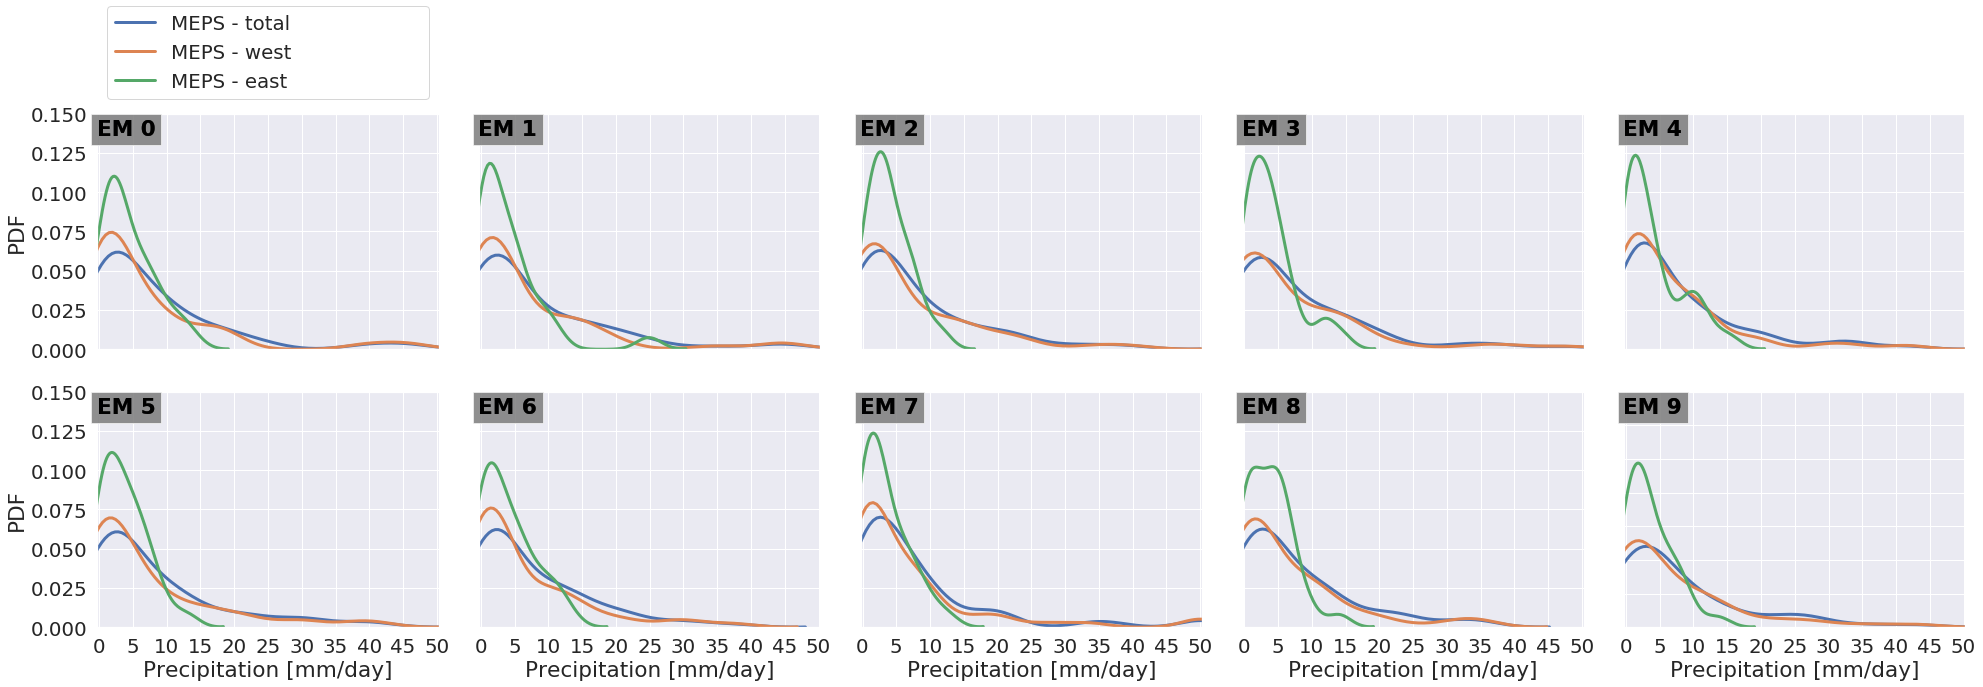

In [19]:
seaborn.set_context("paper")
seaborn.set(font_scale=1.8)
#plt.rcParams.update({'font.size': 40})
seaborn.set_style("darkgrid")

# Three subplots, unpack the axes array immediately
f, axs = plt.subplots(2, 5, sharey=True, sharex=True)
f.set_figheight(10)
f.set_figwidth(28)
f.subplots_adjust(hspace=.35, wspace=.15)

axs = axs.ravel()
for ens_memb in range(10):
    for k in range(3):
        if ens_memb == 0:
            seaborn.distplot(meps_precipitation_24[ens_memb][k,np.where(~np.isnan(meps_precipitation_24[ens_memb][k,:]))],
                    hist=False,
                    kde=True,
                    color = palette[k],
                    kde_kws={'linewidth':3,'clip':(0.,50.)},
                    ax=axs[ens_memb],
                    label=meps_direction[k]
                        )
            axs[ens_memb].legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')
        else:
            seaborn.distplot(meps_precipitation_24[ens_memb][k,np.where(~np.isnan(meps_precipitation_24[ens_memb][k,:]))],
                    hist=False,
                    kde=True,
                    color = palette[k],
                    kde_kws={'linewidth':3},
                    ax=axs[ens_memb],
                   
                        )
        axs[ens_memb].set_xlim([-0.25,50.25])
        axs[ens_memb].set_ylim([0,0.15])
        axs[ens_memb].set_xticks(np.arange(0,55,5))
        axs[ens_memb].set_yticks(np.arange(0,0.2,0.025))
        axs[ens_memb].text(0.17, 0.89, 'EM %s' %ens_memb,
                          verticalalignment='bottom',
                          horizontalalignment='right',
                          transform=axs[ens_memb].transAxes,
                          color='black',
                          fontweight='bold',
                          bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5.5})
        if ens_memb == 5 or ens_memb == 6 or ens_memb == 7 or ens_memb == 8 or ens_memb == 9:
            axs[ens_memb].set_xlabel('Precipitation [mm/day]')
        if ens_memb == 0 or ens_memb == 5:
            axs[ens_memb].set_ylabel('PDF')
plt.tight_layout()

if savefig == 1:
    cF.createFolder('%s/' %(figdir))
    fig_name = 'winter_16_17_MEPS_density'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()

In [20]:
total_precip_24 = dict()
total_precip_24[0] = [obs_precipitation_24[0,:],
                  ret_precipitation_24[0,:],
                  meps_precipitation_24[0][0,:],
                  meps_precipitation_24[1][0,:],
                  meps_precipitation_24[2][0,:],
                  meps_precipitation_24[3][0,:],
                  meps_precipitation_24[4][0,:],
                  meps_precipitation_24[5][0,:],
                  meps_precipitation_24[6][0,:],
                  meps_precipitation_24[7][0,:],
                  meps_precipitation_24[8][0,:],
                  meps_precipitation_24[9][0,:]]

total_precip_24[1] = [obs_precipitation_24[1,:],
                  ret_precipitation_24[1,:],
                  meps_precipitation_24[0][1,:],
                  meps_precipitation_24[1][1,:],
                  meps_precipitation_24[2][1,:],
                  meps_precipitation_24[3][1,:],
                  meps_precipitation_24[4][1,:],
                  meps_precipitation_24[5][1,:],
                  meps_precipitation_24[6][1,:],
                  meps_precipitation_24[7][1,:],
                  meps_precipitation_24[8][1,:],
                  meps_precipitation_24[9][1,:]]

total_precip_24[2] = [obs_precipitation_24[2,:],
                  ret_precipitation_24[2,:],
                  meps_precipitation_24[0][2,:],
                  meps_precipitation_24[1][2,:],
                  meps_precipitation_24[2][2,:],
                  meps_precipitation_24[3][2,:],
                  meps_precipitation_24[4][2,:],
                  meps_precipitation_24[5][2,:],
                  meps_precipitation_24[6][2,:],
                  meps_precipitation_24[7][2,:],
                  meps_precipitation_24[8][2,:],
                  meps_precipitation_24[9][2,:]]


#total_precip_24 = np.array(total_precip_24)

In [21]:
direction =[ ['double fence - total', 'double fence - west', 'double fence - east'],
           ['retrieval - total ', 'retrieved - west', 'retrieved - east'],
           ['MEPS - total ', 'MEPS - west', 'MEPS - east'],
           ['MEPS EM1 - total ', 'MEPS EM1 - west', 'MEPS EM1 - east'],
           ['MEPS EM2 - total ', 'MEPS EM2 - west', 'MEPS EM2 - east'],
           ['MEPS EM3 - total ', 'MEPS EM3 - west', 'MEPS EM3 - east'],
           ['MEPS EM4 - total ', 'MEPS EM4 - west', 'MEPS EM4 - east'],
           ['MEPS EM5 - total ', 'MEPS EM5 - west', 'MEPS EM5 - east'],
           ['MEPS EM6 - total ', 'MEPS EM6 - west', 'MEPS EM6 - east'],
           ['MEPS EM7 - total ', 'MEPS EM7 - west', 'MEPS EM7 - east'],
           ['MEPS EM8 - total ', 'MEPS EM8 - west', 'MEPS EM8 - east'],
           ['MEPS EM9 - total ', 'MEPS EM9 - west', 'MEPS EM9 - east']]
direction = np.array(direction)

In [22]:
linestyles = ['-', '--',':']

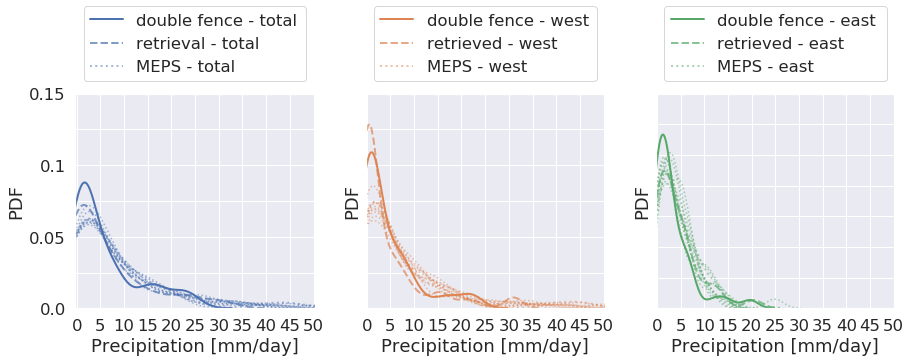

In [23]:
seaborn.set_context("paper")
seaborn.set(font_scale=1.5)
#plt.rcParams.update({'font.size': 40})
seaborn.set_style("darkgrid")
palette = seaborn.color_palette('deep')
palette = palette[:3]

# Three subplots, unpack the axes array immediately
f, axs = plt.subplots(1, 3, sharey=True)
f.set_figheight(4.5*1.2)
f.set_figwidth(13)
f.subplots_adjust(hspace=.35, wspace=.15)

for col in range(3):
    for k in range(np.array(total_precip_24[col]).shape[0]):
#    for k in range(4):
        if k > 2:
            seaborn.distplot(np.array(total_precip_24[col])[k,np.where(~np.isnan(np.array(total_precip_24[col])[k,:]))],
                    hist=False,
                    kde=True,
                    color = palette[col],
                    kde_kws={'linewidth':1.5, 'linestyle':linestyles[2], 'alpha':0.5,'clip':(0.,50.)},
                    ax = axs[col],
         #           label=direction[k,col]
                    )
        elif k == 0:
            seaborn.distplot(np.array(total_precip_24[col])[k,np.where(~np.isnan(np.array(total_precip_24[col])[k,:]))],
                    hist=False,
                    kde=True,
                    color = palette[col],
                    kde_kws={'linewidth':2, 'linestyle':linestyles[k]},
                    ax = axs[col],
                    label=direction[k,col]
                    )
        elif k == 1:
            seaborn.distplot(np.array(total_precip_24[col])[k,np.where(~np.isnan(np.array(total_precip_24[col])[k,:]))],
                    hist=False,
                    kde=True,
                    color = palette[col],
                    kde_kws={'linewidth':2, 'linestyle':linestyles[k],'alpha':0.7,'clip':(0.,50.)},
                    ax = axs[col],
                    label=direction[k,col]
                    )
        elif k == 2:
            seaborn.distplot(np.array(total_precip_24[col])[k,np.where(~np.isnan(np.array(total_precip_24[col])[k,:]))],
                    hist=False,
                    kde=True,
                    color = palette[col],
                    kde_kws={'linewidth':2, 'linestyle':linestyles[k], 'alpha':0.5,'clip':(0.,50.)},
                    ax = axs[col],
                    label=direction[k,col]
                    )
      #  else:
       #     seaborn.distplot(np.array(total_precip_24[col])[k,np.where(~np.isnan(np.array(total_precip_24[col])[k,:]))],
        #            hist=False,
         #           kde=True,
          #          color = palette[col],
           #         kde_kws={'linewidth':3},
            #        ax = axs[col],
             #       )
    axs[col].legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')
    axs[col].set_xlim([-0.25,50.25])
    axs[col].set_ylim([0,0.15])
    axs[col].set_xticks(np.arange(0,55,5))
    axs[col].set_yticks(np.arange(0,0.2,0.025))
    axs[col].set_yticklabels(['0.0', '', '0.05','','0.1','','0.15' ])
    axs[col].set_xlabel('Precipitation [mm/day]')
    axs[col].set_ylabel('PDF')
    
plt.tight_layout()

if savefig == 1:
    cF.createFolder('%s/' %(figdir))
    fig_name = 'winter_16_17_obs_ret_MEPS_density'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()